In [149]:
import sys
print(sys.version)

3.8.10 (default, Nov 14 2022, 12:59:47) 
[GCC 9.4.0]


In [150]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/nlp_hackathon_bd_2023-main/data/train.txt", sep="\n", header=None, encoding="UTF-8")
df

,0
0,তার _ _ O
1,মৃত্যুর _ _ O
2,দশ _ _ O
3,দিন _ _ O
4,"পর, _ _ O"
...,...
170489,প্রথম _ _ O
170490,দরগৌদ _ _ B-CORP
170491,দ্বারা _ _ O
170492,প্রকাশিত _ _ O


In [152]:
#Data analysis
import pandas as pd
import numpy as np
#Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set(font_scale=1)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#Modeling
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestClassifier
# from sklearn_crfsuite import CRF, scorers, metrics
# from sklearn_crfsuite.metrics import flat_classification_report
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats
# import eli5

In [153]:
data = pd.read_csv('/content/drive/MyDrive/nlp_hackathon_bd_2023-main/data/train.txt', sep=' ', header=None)

In [154]:
print(data[3].value_counts())

O         142391
I-GRP       3728
B-PROD      2828
I-PER       2809
I-CW        2531
I-CORP      2414
B-PER       2334
B-CORP      2327
B-GRP       2111
B-LOC       2087
B-CW        1911
I-PROD      1733
I-LOC       1290
Name: 3, dtype: int64


In [155]:
data = data.drop([1, 2], axis=1)

In [156]:
data.head(20)

,0,3
0,তার,O
1,মৃত্যুর,O
2,দশ,O
3,দিন,O
4,"পর,",O
5,১১৫,O
6,কৃষ্ণাঙ্গ,O
7,উচ্চ,O
8,বিদ্যালয়ের,O
9,শিক্ষার্থীরা,O


In [157]:
data = data.rename(columns={0: 'Word', 3: 'Tag'})

In [158]:
words = data

In [159]:
import io

data = []
with io.open("/content/drive/MyDrive/nlp_hackathon_bd_2023-main/data/train.txt", 'r', encoding="utf-8") as f:
    word = []
    token = []
    for line in f:
        fields = line.strip().split(" ")
        if len(fields) == 1:
            data.append((word, token))
            word = []
            token = []
            continue
        word.append(fields[0].strip())
        token.append(fields[3].strip())

#convert to pandas dataframe
import pandas as pd
df = pd.DataFrame(data, columns=['tokens', 'tags'])

print(df.head(20))

                                               tokens  \
0   [তার, মৃত্যুর, দশ, দিন, পর,, ১১৫, কৃষ্ণাঙ্গ, উ...   
1   [ব্রাংম্যান, ডাম্পসন, ১৪০০, সালে, আন্তর্জাতিক,...   
2   [রাজকীয়, বাসস্থান, থেকে, রাজ্যের, মন্দির, পর্...   
3   [তিনি, তৃতীয়, সহস্রাব্দে, গ্র্যান্ড, ওলে, অপ্...   
4   [প্রায়, ১৮,০০০, এর, উচ্চতর, অনুপাত, দোআঁশ, মা...   
5   [ক্যাবলে,, সাবচ্যানেলটি, এক্সফিনিটি, চ্যানেল, ...   
6   [বিশ, বছরেরও, বেশি, সময়, ধরে, রচিত,, কবিতাটি,...   
7   [১৫০৫০, -এর, দশকের, মাঝামাঝি, সময়ে, পার্টি, প...   
8   [চলচ্চিত্রটির, হামসালেখা, দ্বারা, সংগীত, স্কোর...   
9           [রন, ম্যাকগোভনি, -, বেস,, ব্যাকিং, ভোকাল]   
10  [পরবর্তীতে, তিনি, এফসি, হ্যালিফ্যাক্স, টাউন, এ...   
11  [হারিকেনের, সাথে, যুক্ত, সর্বোচ্চ, বৃষ্টিপাত, ...   
12  [ল্যাসি, বাসায়, আসুন, (কুকুর, কোলি), (রডি, ম্...   
13  [প্রতিযোগিতাটি, চায়না, সেন্ট্রাল, টেলিভিশন, এ...   
14  [স্থাপনাটি, হোটেল, হিসেবেও, কাজ, করে, যেখানে, ...   
15  [সাম্প্রতিক, দশকগুলিতে, একটি, ছোট, স্বাধীন, সু...   
16  [তার, স্থলাভিষিক্ত, হন, তার

In [160]:
data = df

In [161]:
data.head()

,tokens,tags
0,"[তার, মৃত্যুর, দশ, দিন, পর,, ১১৫, কৃষ্ণাঙ্গ, উ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, B-LOC,..."
1,"[ব্রাংম্যান, ডাম্পসন, ১৪০০, সালে, আন্তর্জাতিক,...","[O, O, O, O, B-GRP, I-GRP, I-GRP, I-GRP, I-GRP..."
2,"[রাজকীয়, বাসস্থান, থেকে, রাজ্যের, মন্দির, পর্...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
3,"[তিনি, তৃতীয়, সহস্রাব্দে, গ্র্যান্ড, ওলে, অপ্...","[O, O, O, B-CW, I-CW, I-CW, O, O, O, O, O, O]"
4,"[প্রায়, ১৮,০০০, এর, উচ্চতর, অনুপাত, দোআঁশ, মা...","[O, O, O, O, O, B-PROD, O, O, O, O]"


In [162]:
# A class to retrieve the sentences from the dataset
class getsentence(object):
    
    def __init__(self, data):
        self.n_sent = 1.0
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["tokens"].values.tolist(),
                                                           s["tags"].values.tolist())]
#         self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = data['tokens']

In [163]:
data = df
data

,tokens,tags
0,"[তার, মৃত্যুর, দশ, দিন, পর,, ১১৫, কৃষ্ণাঙ্গ, উ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, B-LOC,..."
1,"[ব্রাংম্যান, ডাম্পসন, ১৪০০, সালে, আন্তর্জাতিক,...","[O, O, O, O, B-GRP, I-GRP, I-GRP, I-GRP, I-GRP..."
2,"[রাজকীয়, বাসস্থান, থেকে, রাজ্যের, মন্দির, পর্...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
3,"[তিনি, তৃতীয়, সহস্রাব্দে, গ্র্যান্ড, ওলে, অপ্...","[O, O, O, B-CW, I-CW, I-CW, O, O, O, O, O, O]"
4,"[প্রায়, ১৮,০০০, এর, উচ্চতর, অনুপাত, দোআঁশ, মা...","[O, O, O, O, O, B-PROD, O, O, O, O]"
...,...,...
15294,"[তিনি, জিজিউয়ান, হুয়াজুয়ান, অধ্যয়ন, করেন।]","[O, B-CW, I-CW, O, O]"
15295,"[অ্যালবামটির, শিল্পকর্ম, হিপনোসিস, তৈরি, করেছে।]","[O, O, B-CORP, O, O]"
15296,"[ব্র্যান্ড,, তার, পিতামাতার, মত,, যারা, প্রিপে...","[O, O, O, O, O, B-PROD, I-PROD, I-PROD, O, O, ..."
15297,"[লিভারপুলের, ম্যানেজার, ইয়ুর্গেন, ক্লপ, পরে, ...","[O, O, B-PER, I-PER, O, O, O, O, O, O, O, O, O..."


In [164]:
getter = getsentence(data)
sentences = getter.sentences
#This is how a sentence will look like. 
print(sentences[0])

['তার', 'মৃত্যুর', 'দশ', 'দিন', 'পর,', '১১৫', 'কৃষ্ণাঙ্গ', 'উচ্চ', 'বিদ্যালয়ের', 'শিক্ষার্থীরা', 'তার', 'হত্যার', 'প্রতিবাদে', 'ম্যাককম্ব', 'এর', 'মাধ্যমে', 'মিছিল', 'করেছে।']


In [165]:
#Lets find the number of words in the dataset
word = list(set(words["Word"].values))
n_words = len(word)
print(n_words)

30797


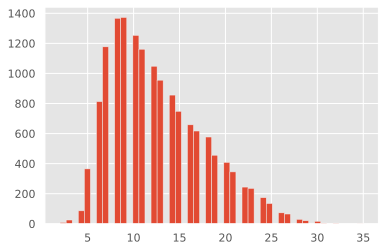

In [166]:
#Lets visualize how the sentences are distributed by their length
plt.style.use("ggplot")
plt.hist([len(s) for s in sentences], bins=50)
plt.show()

*It seems most of the sentences are 8-10 words long, and the distribution is normal.*

In [167]:
#Lets find out the longest sentence length in the dataset
maxlen = max([len(s) for s in sentences])
print ('Maximum sentence length:', maxlen)

Maximum sentence length: 35


*Now that we know the words and sentences, lets try to understand what sort of words each tag contains. This will help us in understanding what each tag type and sub-type represents.*

In [168]:
words

,Word,Tag
0,তার,O
1,মৃত্যুর,O
2,দশ,O
3,দিন,O
4,"পর,",O
...,...,...
170489,প্রথম,O
170490,দরগৌদ,B-CORP
170491,দ্বারা,O
170492,প্রকাশিত,O


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


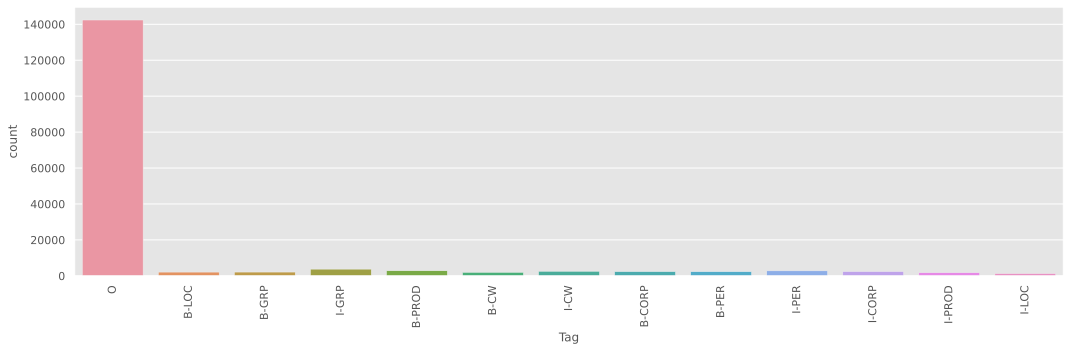

In [169]:
#Words distribution across Tags
plt.figure(figsize=(15, 5))
ax = sns.countplot('Tag', data=words)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

*Quite surprising, most of the words are tagged as outside of any chunk. These words can be considered as fillers and their presence might impact the classifier performance as well. Lets check the dataset again without the O tags.*

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


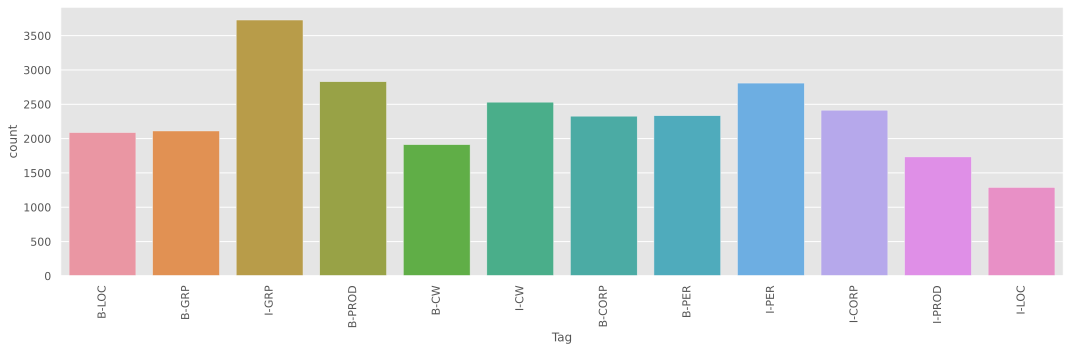

In [170]:
#Words distribution across Tags without O tag
plt.figure(figsize=(15, 5))
ax = sns.countplot('Tag', data=words.loc[words['Tag'] != 'O'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

*Now we shall start with the modeling part where we create new features, create the model and evaluate it on the metrics stated above.*

In [171]:
!pip install bnlp_toolkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [172]:
!pip install fasttext==0.9.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [173]:
!pip install bangla-stemmer
from bangla_stemmer.stemmer import stemmer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [174]:
!pip install bnltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [175]:
df = pd.read_csv("/content/drive/MyDrive/nlp_hackathon_bd_2023-main/p_train.csv")
df_dev = pd.read_csv("/content/drive/MyDrive/nlp_hackathon_bd_2023-main/p_dev.csv")

In [176]:
df

,text,label,acronym,len,stem,position,pos,suffix,prefix,ner
0,তার,O,ত,3,তার,0,PPR,তার,তার,S-PER
1,মৃত্যুর,O,ম,7,মৃত্যুর,1,NC,্যুর,মৃত্,O
2,দশ,O,দ,2,দশ,2,JQ,দশ,দশ,O
3,দিন,O,দ,3,দিন,3,NC,দিন,দিন,O
4,"পর,",O,প,3,"পর,",4,NST,"পর,","পর,",O
...,...,...,...,...,...,...,...,...,...,...
191892,প্রথম,O,প,5,প্রথম,1,JQ,্রথম,প্রথ,O
191893,দরগৌদ,B-CORP,দ,5,দরগৌদ,2,NC,রগৌদ,দরগৌ,O
191894,দ্বারা,O,দ,6,দ্বা,3,PP,বারা,দ্বা,O
191895,প্রকাশিত,O,প,8,প্রকাশিত,4,JJ,াশিত,প্রক,O


In [177]:
# n_steps_in = 2
# X_new = pd.DataFrame()
# X_new2 = pd.DataFrame()
# k=0
# for i in range(1,n_steps_in):
#   X_new[df.columns[k] + '(' + str(-i) + ')'] = df.iloc[:,k].shift(i)
#   X_new[df.columns[k] + '(' + str(+i) + ')'] = df.iloc[:,k].shift(-i)
#   X_new2[df_dev.columns[k] + '(' + str(-i) + ')'] = df_dev.iloc[:,k].shift(i)
#   X_new2[df_dev.columns[k] + '(' + str(+i) + ')'] = df_dev.iloc[:,k].shift(-i)
# X_new

In [178]:
# df = pd.concat([df, X_new], axis=1)
# df_dev = pd.concat([df_dev, X_new2], axis=1)
# df_concat

In [179]:
# df = df.dropna()
# df_dev = df_dev.fillna(0)
# df_concat

In [180]:
# one_hot = pd.get_dummies(df['pos'])
# # Drop column B as it is now encoded
# df = df.drop('pos',axis = 1)
# # Join the encoded df
# df = df.join(one_hot)

# one_hot2 = pd.get_dummies(df_dev['pos'])
# # Drop column B as it is now encoded
# df_dev = df_dev.drop('pos',axis = 1)
# # Join the encoded df
# df_dev = df_dev.join(one_hot)

from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

df['pos']= label_encoder.fit_transform(df['pos'])
df_dev['pos']= label_encoder.fit_transform(df_dev['pos'])

In [181]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['acronym']= label_encoder.fit_transform(df['acronym'])
df_dev['acronym']= label_encoder.fit_transform(df_dev['acronym'])


In [182]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['suffix']= label_encoder.fit_transform(df['suffix'])
df_dev['suffix']= label_encoder.fit_transform(df_dev['suffix'])


In [183]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['prefix']= label_encoder.fit_transform(df['prefix'])
df_dev['prefix']= label_encoder.fit_transform(df_dev['prefix'])


In [184]:
df

,text,label,acronym,len,stem,position,pos,suffix,prefix,ner
0,তার,O,81,3,তার,0,18,4224,5742,S-PER
1,মৃত্যুর,O,90,7,মৃত্যুর,1,13,14879,9212,O
2,দশ,O,83,2,দশ,2,10,4543,5996,O
3,দিন,O,83,3,দিন,3,13,4617,6073,O
4,"পর,",O,86,3,"পর,",4,15,5544,6827,O
...,...,...,...,...,...,...,...,...,...,...
191892,প্রথম,O,86,5,প্রথম,1,10,14909,7313,O
191893,দরগৌদ,B-CORP,83,5,দরগৌদ,2,13,7682,5974,O
191894,দ্বারা,O,83,6,দ্বা,3,17,6313,6216,O
191895,প্রকাশিত,O,86,8,প্রকাশিত,4,9,11688,7304,O


In [185]:
embeddings_dict = {}
glove_path = "/content/drive/MyDrive/nlp_hackathon_bd_2023-main/bn_glove.39M.100d.txt"
with open(glove_path, 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [186]:
def tovec(label):
  if label in embeddings_dict:
    return embeddings_dict[label]
  return np.zeros((100,))

df['stem'] = df['stem'].apply(tovec)
df_dev['stem'] = df_dev['stem'].apply(tovec)
df['text'] = df['text'].apply(tovec)
df_dev['text'] = df_dev['text'].apply(tovec)
# df['text(-1)'] = df['text(-1)'].apply(tovec)
# df_dev['text(-1)'] = df_dev['text(-1)'].apply(tovec)
# df['text(1)'] = df['text(1)'].apply(tovec)
# df_dev['text(1)'] = df_dev['text(1)'].apply(tovec)

In [187]:
text_df = pd.DataFrame(df['text'].tolist())
text_df2 = pd.DataFrame(df_dev['text'].tolist())
# text_df_1 = pd.DataFrame(df['text(1)'].tolist())
# text_df_12 = pd.DataFrame(df_dev['text(1)'].tolist())
# text_df_2 = pd.DataFrame(df['text(-1)'].tolist())
# text_df_22 = pd.DataFrame(df_dev['text(-1)'].tolist())

In [188]:
stem_df = pd.DataFrame(df['stem'].tolist())
stem_df2 = pd.DataFrame(df_dev['stem'].tolist())


In [189]:
# df_concat = pd.concat([df, stem_df,text_df,text_df_1,text_df_2], axis=1)
# df_concat2 = pd.concat([df_dev, stem_df2,text_df2,text_df_12,text_df_22], axis=1)
# df_concat = pd.concat([df, text_df,stem_df], axis=1)
# df_concat2 = pd.concat([df_dev, text_df2,stem_df2], axis=1)
df_concat = pd.concat([df, text_df], axis=1)
df_concat2 = pd.concat([df_dev, text_df2], axis=1)

In [190]:
# df_concat.drop(['text','stem','text(-1)','text(1)'],axis=1,inplace=True)
# df_concat2.drop(['text','stem','text(-1)','text(1)'],axis=1,inplace=True)
df_concat.drop(['text','stem'],axis=1,inplace=True)
df_concat2.drop(['text','stem'],axis=1,inplace=True)

In [191]:
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df_concat['ner']= label_encoder.fit_transform(df_concat['ner'])
df_concat2['ner']= label_encoder.fit_transform(df_concat2['ner'])

In [192]:
df_concat

,label,acronym,len,position,pos,suffix,prefix,ner,0,1,...,90,91,92,93,94,95,96,97,98,99
0,O,81,3,0,18,4224,5742,7,-0.567825,0.546562,...,-0.839484,-0.188612,0.172525,0.008679,-1.484177,-0.511203,0.859361,-0.530290,0.893684,0.485529
1,O,90,7,1,13,14879,9212,3,-0.608971,-0.137598,...,0.067866,-0.627265,0.034878,0.248529,0.016602,-0.216626,1.042870,-0.358600,0.344924,0.275201
2,O,83,2,2,10,4543,5996,3,-0.116706,-0.122278,...,-0.281257,-0.037228,-0.007593,0.423479,-0.908833,-0.335918,-0.132443,-0.268015,0.257489,1.127643
3,O,83,3,3,13,4617,6073,3,0.170154,-0.084126,...,0.033605,-0.108296,-0.352047,-0.099999,-0.658781,-0.150818,-0.782674,-0.152276,0.843133,0.734512
4,O,86,3,4,15,5544,6827,3,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191892,O,86,5,1,10,14909,7313,3,-0.347509,0.361223,...,-0.838649,-0.330464,-0.346068,0.059879,-0.590808,0.298885,0.270799,-0.820639,0.675806,0.184513
191893,B-CORP,83,5,2,13,7682,5974,3,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
191894,O,83,6,3,17,6313,6216,3,0.232599,0.297687,...,0.765101,-0.247181,0.478906,-0.148551,-0.428720,0.706504,0.963554,0.045567,-0.525532,0.066184
191895,O,86,8,4,9,11688,7304,3,-0.218561,0.326054,...,-0.529315,0.474147,-0.201411,-0.306448,-0.133939,1.474403,0.544760,-1.009584,1.172764,0.494770


In [193]:
df_concat2

,label,acronym,len,position,pos,suffix,prefix,ner,0,1,...,90,91,92,93,94,95,96,97,98,99
0,O,35,4,0,16,794,1163,5,-0.501397,0.586703,...,-0.836586,-0.645791,0.021888,-0.269968,-1.183863,0.287437,0.232249,-0.267168,0.895409,0.984945
1,O,45,4,1,11,1564,2101,5,-1.231886,-0.458755,...,-0.634123,0.180141,-0.712377,0.763166,-0.998170,0.055965,-0.374400,0.186572,-0.389076,0.556114
2,O,51,6,2,24,2049,2690,1,-0.460472,0.699772,...,-0.266328,-0.785242,0.440461,-0.204391,-0.606774,-0.541129,0.072939,-0.113078,1.001724,0.364075
3,B-GRP,48,7,3,12,2612,2366,1,-0.393248,0.177087,...,-0.318916,0.126027,0.894192,0.247438,0.059034,-0.290867,-0.270635,-0.198486,-0.020872,-0.084877
4,I-GRP,42,6,4,11,929,1797,1,0.562997,0.097186,...,-0.378861,-0.078636,-0.395451,0.094875,-0.127497,-0.102036,-0.445883,0.176089,0.629447,-0.283647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10328,O,48,9,3,1,2285,2359,1,-0.123101,0.367882,...,0.018321,-0.431224,0.571648,-0.033915,-0.914777,0.537116,0.613946,-0.143413,-0.622164,0.517428
10329,O,42,14,4,1,1348,1854,1,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10330,O,46,4,5,24,1709,2189,1,-0.064898,0.558854,...,0.457068,-0.416261,0.448882,0.638193,-0.267091,0.528841,0.213239,0.392496,-1.064339,0.111232
10331,O,37,4,6,14,908,1257,1,-0.883639,-0.444285,...,-0.831569,-0.752827,1.088290,-0.508363,-0.006640,-0.603532,0.060379,-0.790174,0.223200,0.750661


In [194]:
df_concat = df_concat.dropna()
df_concat2 = df_concat2.fillna(0)

           acronym       len  position       pos    suffix    prefix       ner
acronym   1.000000  0.146756  0.004694  0.001660  0.423875  0.902828 -0.187738
len       0.146756  1.000000 -0.019575 -0.101621  0.357683  0.115194 -0.047293
position  0.004694 -0.019575  1.000000  0.062751 -0.045971 -0.013807 -0.100932
pos       0.001660 -0.101621  0.062751  1.000000  0.075193  0.095507  0.092518
suffix    0.423875  0.357683 -0.045971  0.075193  1.000000  0.462473 -0.097862
prefix    0.902828  0.115194 -0.013807  0.095507  0.462473  1.000000 -0.092860
ner      -0.187738 -0.047293 -0.100932  0.092518 -0.097862 -0.092860  1.000000


Text(0.5, 1.0, 'Correlation Matrix of Core Features')

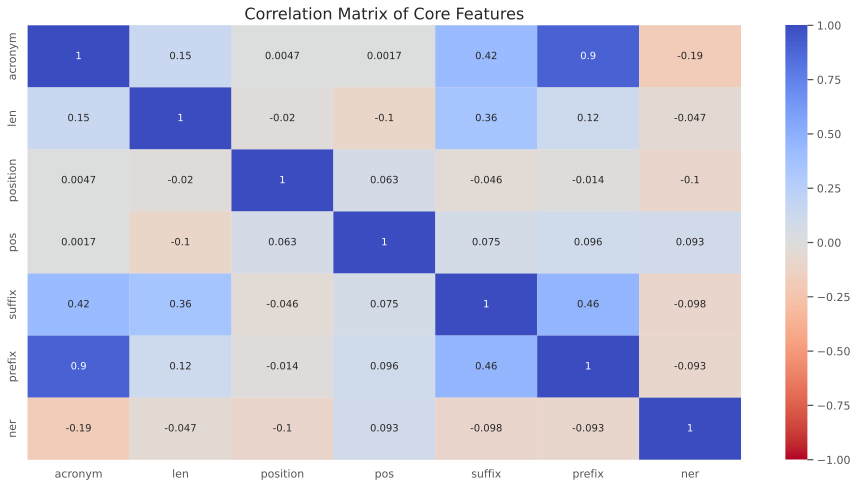

In [195]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

corrmat = df_concat[['label','acronym','len','position','pos','suffix','prefix','ner']].corr()
print(corrmat)
sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax)
ax.set_title('Correlation Matrix of Core Features', fontsize=16)

In [196]:
# f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

# corrmat = df_concat.drop(df_concat.columns[range(1,6,1)],axis = 1).corr()

# print(corrmat)
# sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap='coolwarm_r', ax=ax)
# ax.set_title('Correlation Matrix of Core Features', fontsize=16)

In [197]:
#dropping ner
# df_concat.drop(['ner'],axis=1,inplace=True)
# df_concat2.drop(['ner'],axis=1,inplace=True)

In [198]:
sum = 0
for s in sentences:
    sum+= len(s)
sum/=len(sentences)
print(sum)

12.542715210144454


In [199]:
# dfw.columns

In [200]:
# dfw = df_concat
# dfw['length_of_word'] = dfw['Word'].str.len()
# dfw

In [201]:
tag_map = df_concat['label'].unique()

In [202]:
mp = {}
for i in range(len(tag_map)):
  mp[tag_map[i]] = i

In [203]:
mp

{'O': 0,
 'B-LOC': 1,
 'B-GRP': 2,
 'I-GRP': 3,
 'B-PROD': 4,
 'B-CW': 5,
 'I-CW': 6,
 'B-CORP': 7,
 'B-PER': 8,
 'I-PER': 9,
 'I-CORP': 10,
 'I-PROD': 11,
 'I-LOC': 12}

In [204]:
def tofloat(label):
  return mp[label]

df_concat['label'] = df_concat['label'].apply(tofloat)
df_concat2['label'] = df_concat2['label'].apply(tofloat)
df_concat

<ipython-input-204-c0df215ab011>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat['label'] = df_concat['label'].apply(tofloat)


,label,acronym,len,position,pos,suffix,prefix,ner,0,1,...,90,91,92,93,94,95,96,97,98,99
0,0,81,3,0,18,4224,5742,7,-0.567825,0.546562,...,-0.839484,-0.188612,0.172525,0.008679,-1.484177,-0.511203,0.859361,-0.530290,0.893684,0.485529
1,0,90,7,1,13,14879,9212,3,-0.608971,-0.137598,...,0.067866,-0.627265,0.034878,0.248529,0.016602,-0.216626,1.042870,-0.358600,0.344924,0.275201
2,0,83,2,2,10,4543,5996,3,-0.116706,-0.122278,...,-0.281257,-0.037228,-0.007593,0.423479,-0.908833,-0.335918,-0.132443,-0.268015,0.257489,1.127643
3,0,83,3,3,13,4617,6073,3,0.170154,-0.084126,...,0.033605,-0.108296,-0.352047,-0.099999,-0.658781,-0.150818,-0.782674,-0.152276,0.843133,0.734512
4,0,86,3,4,15,5544,6827,3,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191892,0,86,5,1,10,14909,7313,3,-0.347509,0.361223,...,-0.838649,-0.330464,-0.346068,0.059879,-0.590808,0.298885,0.270799,-0.820639,0.675806,0.184513
191893,7,83,5,2,13,7682,5974,3,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
191894,0,83,6,3,17,6313,6216,3,0.232599,0.297687,...,0.765101,-0.247181,0.478906,-0.148551,-0.428720,0.706504,0.963554,0.045567,-0.525532,0.066184
191895,0,86,8,4,9,11688,7304,3,-0.218561,0.326054,...,-0.529315,0.474147,-0.201411,-0.306448,-0.133939,1.474403,0.544760,-1.009584,1.172764,0.494770


In [205]:
df_concat2

,label,acronym,len,position,pos,suffix,prefix,ner,0,1,...,90,91,92,93,94,95,96,97,98,99
0,0,35,4,0,16,794,1163,5,-0.501397,0.586703,...,-0.836586,-0.645791,0.021888,-0.269968,-1.183863,0.287437,0.232249,-0.267168,0.895409,0.984945
1,0,45,4,1,11,1564,2101,5,-1.231886,-0.458755,...,-0.634123,0.180141,-0.712377,0.763166,-0.998170,0.055965,-0.374400,0.186572,-0.389076,0.556114
2,0,51,6,2,24,2049,2690,1,-0.460472,0.699772,...,-0.266328,-0.785242,0.440461,-0.204391,-0.606774,-0.541129,0.072939,-0.113078,1.001724,0.364075
3,2,48,7,3,12,2612,2366,1,-0.393248,0.177087,...,-0.318916,0.126027,0.894192,0.247438,0.059034,-0.290867,-0.270635,-0.198486,-0.020872,-0.084877
4,3,42,6,4,11,929,1797,1,0.562997,0.097186,...,-0.378861,-0.078636,-0.395451,0.094875,-0.127497,-0.102036,-0.445883,0.176089,0.629447,-0.283647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10328,0,48,9,3,1,2285,2359,1,-0.123101,0.367882,...,0.018321,-0.431224,0.571648,-0.033915,-0.914777,0.537116,0.613946,-0.143413,-0.622164,0.517428
10329,0,42,14,4,1,1348,1854,1,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10330,0,46,4,5,24,1709,2189,1,-0.064898,0.558854,...,0.457068,-0.416261,0.448882,0.638193,-0.267091,0.528841,0.213239,0.392496,-1.064339,0.111232
10331,0,37,4,6,14,908,1257,1,-0.883639,-0.444285,...,-0.831569,-0.752827,1.088290,-0.508363,-0.006640,-0.603532,0.060379,-0.790174,0.223200,0.750661


In [206]:
for i in range(len(df_concat.columns)):
  print(i,df_concat.columns[i])

0 label
1 acronym
2 len
3 position
4 pos
5 suffix
6 prefix
7 ner
8 0
9 1
10 2
11 3
12 4
13 5
14 6
15 7
16 8
17 9
18 10
19 11
20 12
21 13
22 14
23 15
24 16
25 17
26 18
27 19
28 20
29 21
30 22
31 23
32 24
33 25
34 26
35 27
36 28
37 29
38 30
39 31
40 32
41 33
42 34
43 35
44 36
45 37
46 38
47 39
48 40
49 41
50 42
51 43
52 44
53 45
54 46
55 47
56 48
57 49
58 50
59 51
60 52
61 53
62 54
63 55
64 56
65 57
66 58
67 59
68 60
69 61
70 62
71 63
72 64
73 65
74 66
75 67
76 68
77 69
78 70
79 71
80 72
81 73
82 74
83 75
84 76
85 77
86 78
87 79
88 80
89 81
90 82
91 83
92 84
93 85
94 86
95 87
96 88
97 89
98 90
99 91
100 92
101 93
102 94
103 95
104 96
105 97
106 98
107 99


In [207]:
#dropping all except glove
df_concat = df_concat.drop(df_concat.columns[range(1,8,1)],axis = 1)
df_concat2 = df_concat2.drop(df_concat2.columns[range(1,8,1)],axis = 1)
df_concat

,label,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,0,-0.567825,0.546562,0.135419,-0.494754,0.837484,-0.384398,0.194066,0.162845,-0.435454,...,-0.839484,-0.188612,0.172525,0.008679,-1.484177,-0.511203,0.859361,-0.530290,0.893684,0.485529
1,0,-0.608971,-0.137598,-0.359074,-0.210530,0.405457,0.370650,0.123518,-0.341182,0.089358,...,0.067866,-0.627265,0.034878,0.248529,0.016602,-0.216626,1.042870,-0.358600,0.344924,0.275201
2,0,-0.116706,-0.122278,-0.017353,0.433213,-0.040502,-0.310997,-0.369088,-0.018789,-0.283218,...,-0.281257,-0.037228,-0.007593,0.423479,-0.908833,-0.335918,-0.132443,-0.268015,0.257489,1.127643
3,0,0.170154,-0.084126,0.621158,-0.697819,0.264601,0.411766,-0.550866,-0.613263,-0.179928,...,0.033605,-0.108296,-0.352047,-0.099999,-0.658781,-0.150818,-0.782674,-0.152276,0.843133,0.734512
4,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191892,0,-0.347509,0.361223,0.247318,-0.339039,-0.281474,0.292484,-0.617909,-0.023950,0.387940,...,-0.838649,-0.330464,-0.346068,0.059879,-0.590808,0.298885,0.270799,-0.820639,0.675806,0.184513
191893,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
191894,0,0.232599,0.297687,-0.573807,-0.582245,0.146339,-0.233114,-0.651006,-0.257341,-0.171366,...,0.765101,-0.247181,0.478906,-0.148551,-0.428720,0.706504,0.963554,0.045567,-0.525532,0.066184
191895,0,-0.218561,0.326054,0.187036,-1.156048,1.004092,0.393563,-0.655234,-0.191950,-0.530128,...,-0.529315,0.474147,-0.201411,-0.306448,-0.133939,1.474403,0.544760,-1.009584,1.172764,0.494770


In [208]:
#DROP COLS
# df_concat = df_concat.drop(['pos','position'],axis=1)
# df_concat2 = df_concat2.drop(['pos','position'],axis=1)

In [209]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import f1_score

class Model():
    
    def __init__(self):
        self.random_forest = RandomForestClassifier(n_estimators=5, random_state=42)
        self.decision_tree = DecisionTreeClassifier()
        self.mlp = MLPClassifier(hidden_layer_sizes=(300,150), max_iter=200,activation ='relu',solver='adam',random_state=1)
        self.xgb = XGBClassifier(n_estimators=100)
        self.lgbm = LGBMClassifier(learning_rate = 0.01, num_iterations = 1000)
        self.svc = make_pipeline(StandardScaler(), SVC())
#         self.ensemble = VotingRegressor([('lgbm', self.lgbm), ('xgb', self.xgb), ('svr', self.svr)])
      # self.ensemble = VotingRegressor([('lgbm', self.lgbm), ('xgb', self.xgb), ('rf', self.random_forest), ('mlp', self.mlp)])
        self.ensemble = VotingClassifier([('svc', self.svc), ('rf', self.random_forest),('lgbm', self.lgbm)])
        self.model = self.random_forest
        return 
    
    def train_model(self, dfw):
        X,y = self.preprocessing(dfw)
        print("preprocessing done")
        # df.to_csv('new_merged.csv', index=False)
        
        X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)

        self.model.fit(X_train,y_train)
        print("train done")
        pred_y = self.model.predict(X_valid)
        print("prediction done")
        # pred_y = list(self.encoder.inverse_transform(pred_y))
        # valid_y_array = y_valid.values.ravel()
        sc = f1_score(y_valid, pred_y, average='macro')
        print("f1 score",sc)
    
    def predict(self,df_dev,valid=False):
        print("predict function")
        # df_dev['Tag'] = df_dev['Tag'].apply(tofloat)
        # print("len(df_dev)",len(df_dev))
        X,y = self.preprocessing(df_dev,valid)
        print("y len",len(y))
        print("preprocessing done")
        pred_y = self.model.predict(X)
        print("pred_y",len(pred_y))
        print("prediction done")
        # pred_y = list(self.encoder.inverse_transform(pred_y))
        # valid_y_array = y.values.ravel()
        sc = f1_score(y, pred_y, average='macro')
        print("f1 score",sc)
        return pred_y
    

    
    def preprocessing(self,dfw,valid=False):
        # words = []
        # tags = []
        # for idx,row in dfw.iterrows():
        #   try:
        #     w = row["Word"]
        #     words.append(feature_map(w))
        #     tags.append(row["Tag"])
        #   except:
        #     w = row["Word"]
        #     words.append(fake_feature_map(w))
        #     tags.append(row["Tag"])
        # X = words
        # y = tags
        # idx=0
        # if not valid:
        #   sz = len(words[0])
        #   for w in words:
        #     if len(w)!=sz:
        #       print("idx",idx)
        #       print(len(w))
        #       X.pop(idx)
        #       y.pop(idx)
              
        #     idx+=1
        X = dfw.drop(['label'],axis=1)
        y = dfw['label']

        X = np.array(X)
        y = np.array(y)
        return X,y
      
    def get_model():
      return self.model


In [210]:
model = Model()
model.train_model(df_concat)

preprocessing done
train done
prediction done
f1 score 0.3719075297803779


In [211]:
prediction = model.predict(df_concat2,True)
prediction

predict function
y len 10333
preprocessing done
pred_y 10333
prediction done
f1 score 0.3949257065627841


array([0, 0, 0, ..., 0, 0, 0])

In [212]:
tag_map

array(['O', 'B-LOC', 'B-GRP', 'I-GRP', 'B-PROD', 'B-CW', 'I-CW', 'B-CORP',
       'B-PER', 'I-PER', 'I-CORP', 'I-PROD', 'I-LOC'], dtype=object)

In [213]:
prediction2 = []
for i in range(len(prediction)):
  # print(prediction[i])
  prediction2.append(tag_map[prediction[i]])

In [214]:
len(prediction2)

10333

In [215]:
f2 = open('/content/drive/MyDrive/nlp_hackathon_bd_2023-main/data/dev_pred_labels.txt','w')

idx=0
with open('/content/drive/MyDrive/nlp_hackathon_bd_2023-main/data/dev.txt', 'r') as f:
    for line in f:
      if len(line)<2:
        f2.write('\n')
      else:
        f2.write(prediction2[idx]+"\n")
        idx+=1
f2.close()

In [216]:
%cd drive/MyDrive/nlp_hackathon_bd_2023-main/data/

[Errno 2] No such file or directory: 'drive/MyDrive/nlp_hackathon_bd_2023-main/data/'
/content/drive/MyDrive/nlp_hackathon_bd_2023-main/data


In [217]:
!ls

dev_gt_labels.txt		  sample_test_set.txt
dev_pred_labels_2.txt		  test2.txt
dev_pred_labels.txt		  test_labels_dummy.txt
dev_pred_labels_xgb_onlyvec.txt   test_labels_pred_file.txt
dev.txt				  test_labels_pred_file_.txt
eval_main.py			  test.txt
results.csv			  train.txt
sample_test_labels_pred_file.txt  voting_classifier.joblib


In [218]:
!python eval_main.py --true dev_gt_labels.txt --pred dev_pred_labels.txt


{
  "P@LOC": 0.36206896551724077,
  "R@LOC": 0.20792079207920772,
  "F1@LOC": 0.26415094339617967,
  "P@PROD": 0.481481481481481,
  "R@PROD": 0.27368421052631564,
  "F1@PROD": 0.3489932885905575,
  "P@CW": 0.026315789473684143,
  "R@CW": 0.008333333333333326,
  "F1@CW": 0.012658227848064715,
  "P@CORP": 0.5660377358490556,
  "R@CORP": 0.23622047244094468,
  "F1@CORP": 0.3333333333332914,
  "P@PER": 0.08888888888888881,
  "R@PER": 0.08333333333333327,
  "F1@PER": 0.08602150537629406,
  "P@GRP": 0.21428571428571397,
  "R@GRP": 0.1271186440677965,
  "F1@GRP": 0.15957446808505946,
  "Precision": 0.2835497835497835,
  "Recall": 0.16374999999999998,
  "F1": 0.20760697305859063,
  "MD@R": 0.1975,
  "MD@P": 0.341991341991342,
  "MD@F1": 0.2503961965134242,
  "ALLTRUE": 800,
  "ALLRECALLED": 158,
  "ALLPRED": 462
}
Precision 0.28, Recall 0.16, F1 0.21


In [219]:
df_concat2.columns

Index(['label',       0,       1,       2,       3,       4,       5,       6,
             7,       8,
       ...
            90,      91,      92,      93,      94,      95,      96,      97,
            98,      99],
      dtype='object', length=101)

In [220]:
# try:
#   acc_df = pd.read_csv('/content/drive/MyDrive/nlp_hackathon_bd_2023-main/data/results.csv')
# except:
#   acc_df = pd.DataFrame(columns=['Model','Features','F1'])

# acc_df2 = {'Model': 'Random Forest,SVC,LGBM', 'Features': 'Glove Vectors', 'F1': 0.21}
# acc_df = acc_df.append(acc_df2, ignore_index = True)
# acc_df.to_csv('/content/drive/MyDrive/nlp_hackathon_bd_2023-main/data/results.csv',index=False)

In [221]:
# from joblib import dump, load
# dump(model.model, '/content/drive/MyDrive/nlp_hackathon_bd_2023-main/data/voting_classifier.joblib')

['/content/drive/MyDrive/nlp_hackathon_bd_2023-main/data/voting_classifier.joblib']